1) Cargamos los datos 

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("data/aw_fb_data.csv", sep=",", index_col=0)

In [3]:
data.head(3)

,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


2) Preparación de la data 

In [4]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,X1,0,0.0,0,0.000000,3656,int64
1,age,0,0.0,0,0.000000,24,int64
2,gender,0,0.0,3279,0.523467,2,int64
3,height,0,0.0,0,0.000000,28,float64
4,weight,0,0.0,0,0.000000,43,float64
5,steps,0,0.0,0,0.000000,3919,float64
6,hear_rate,0,0.0,0,0.000000,4514,float64
7,calories,0,0.0,0,0.000000,2136,float64
8,distance,0,0.0,0,0.000000,4863,float64
9,entropy_heart,0,0.0,18,0.002874,56,float64


Eliminar la columna X1 y hacer un get dummies.

In [5]:
data = data.drop(["X1"], axis=1)

In [6]:
data.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.0,19.531302,0.138520,1.0,0.089692,apple watch,Lying
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.0,19.453390,0.137967,1.0,0.102088,apple watch,Lying
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.0,19.540825,0.138587,1.0,0.115287,apple watch,Lying


In [7]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

3) AED & Storytelling 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'weight'}>],
       [<AxesSubplot: title={'center': 'steps'}>,
        <AxesSubplot: title={'center': 'hear_rate'}>,
        <AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'distance'}>],
       [<AxesSubplot: title={'center': 'entropy_heart'}>,
        <AxesSubplot: title={'center': 'entropy_setps'}>,
        <AxesSubplot: title={'center': 'resting_heart'}>,
        <AxesSubplot: title={'center': 'corr_heart_steps'}>],
       [<AxesSubplot: title={'center': 'norm_heart'}>,
        <AxesSubplot: title={'center': 'intensity_karvonen'}>,
        <AxesSubplot: title={'center': 'sd_norm_heart'}>,
        <AxesSubplot: title={'center': 'steps_times_distance'}>]],
      dtype=object)

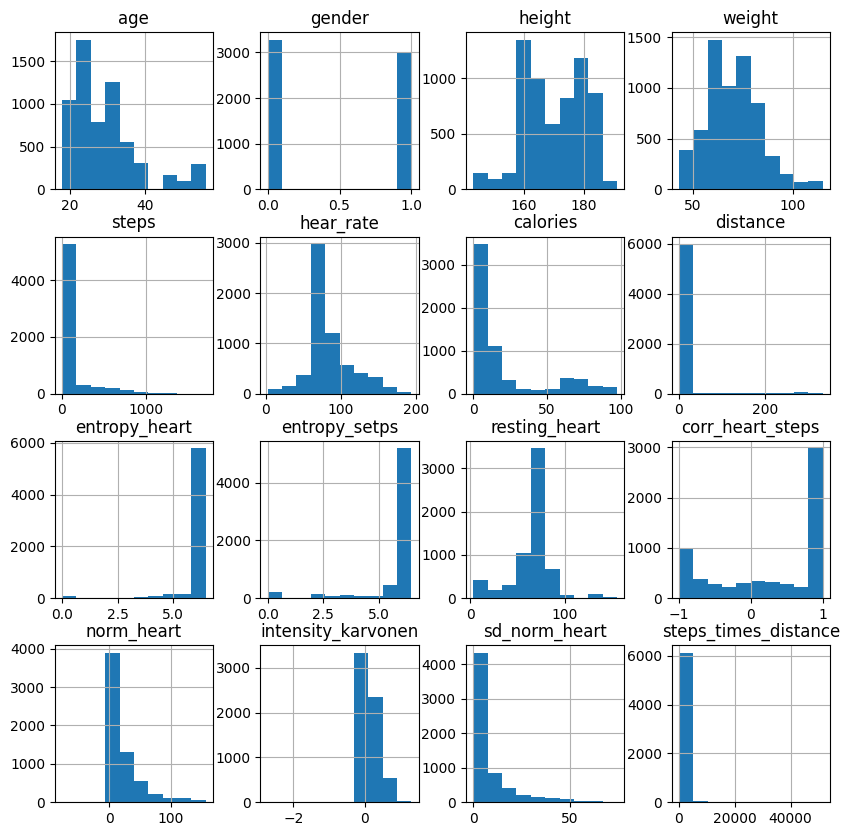

In [8]:
data.hist(figsize = (10,10))

In [9]:
len(data)

6264

In [10]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data_OHE = pd.get_dummies(data)

In [12]:
data_OHE.head(3)

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,sd_norm_heart,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,1.0,0.089692,1,0,1,0,0,0,0,0
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,1.0,0.102088,1,0,1,0,0,0,0,0
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,1.0,0.115287,1,0,1,0,0,0,0,0


In [13]:
status(data_OHE)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


4) Clustering con K-Means

 4.1) Normalizar los datos (z-score)

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(data_OHE)
x_data_norm=std_scaler.transform(data_OHE)


pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,...,6.264000e+03,6.264000e+03,6264.000000,6264.000000,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03,6.264000e+03
mean,2.268655e-17,2.177909e-16,-5.172533e-16,3.720594e-16,1.814924e-16,9.074620e-17,1.814924e-16,-1.814924e-17,-9.165366e-16,7.985665e-16,...,3.629848e-17,-9.074620e-18,0.000000,0.000000,-3.232833e-17,-2.608953e-17,-2.949251e-17,4.991041e-17,-3.913430e-17,5.671637e-18
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,...,1.000080e+00,1.000080e+00,1.000080,1.000080,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-1.252603e+00,-9.541166e-01,-2.587115e+00,-1.978652e+00,-4.873068e-01,-2.929548e+00,-7.109949e-01,-3.011055e-01,-7.877479e+00,-4.569150e+00,...,-6.471041e-01,-1.452030e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
25%,-6.913270e-01,-9.541166e-01,-9.404466e-01,-7.147873e-01,-4.686358e-01,-3.680869e-01,-6.861079e-01,-3.006985e-01,1.021668e-01,1.348908e-01,...,-6.259839e-01,-1.450410e-01,-1.183993,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
50%,-1.300505e-01,-9.541166e-01,-1.655436e-01,-1.200273e-01,-4.464951e-01,-3.098031e-01,-5.665760e-01,-2.971593e-01,2.083702e-01,3.321103e-01,...,-4.162532e-01,-1.419133e-01,0.844599,-0.844599,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
75%,4.312259e-01,1.048090e+00,9.968107e-01,5.713812e-01,-1.667584e-02,3.325684e-01,3.765169e-02,4.059042e-02,2.842709e-01,4.043337e-01,...,1.251642e-01,-1.221373e-01,0.844599,1.183993,-5.313123e-01,-4.228156e-01,-4.363736e-01,-4.650921e-01,-4.066883e-01,-4.175562e-01
max,3.013097e+00,1.048090e+00,2.062302e+00,3.374187e+00,7.201889e+00,3.776815e+00,2.857381e+00,6.991359e+00,5.818567e-01,5.856720e-01,...,5.293335e+00,1.253348e+01,0.844599,1.183993,1.882132e+00,2.365097e+00,2.291614e+00,2.150112e+00,2.458886e+00,2.394887e+00


4.2) Creación del modelo

In [15]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [16]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([2, 2, 2, ..., 1, 1, 1])

 4.3) Utilizo kelbow_visualizer para buscar cantidad de clusters optima

In [17]:
cl_model

KMeans(max_iter=100, n_clusters=3, n_init='auto', random_state=0)

In [18]:
from copy import deepcopy

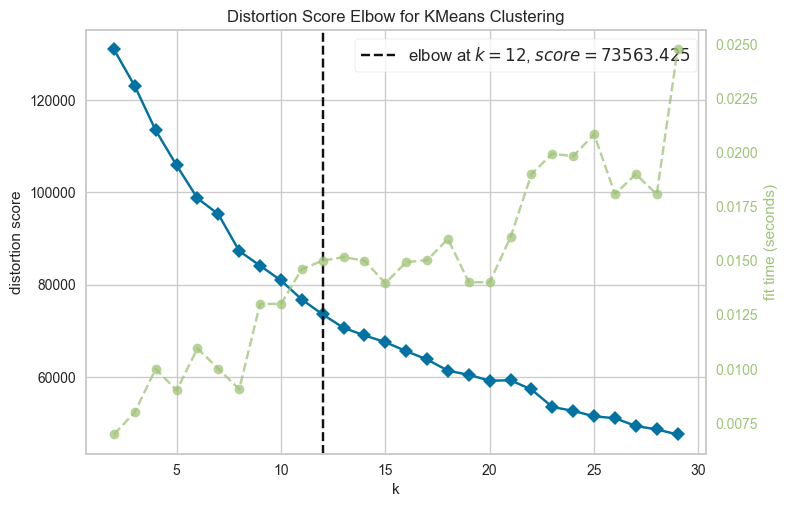

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, n_init='auto',
                                  random_state=0),
                 k=(2, 30))

In [19]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) 

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

K=12 es el Número de Clusters óptimo

4.4) Analizando el modelo final: Gráfico de coordenadas

In [20]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=data_OHE.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # el predict es de los datos normalizados

In [21]:
x_data_cl.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,...,0.089692,1,0,1,0,0,0,0,0,2
2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,...,0.102088,1,0,1,0,0,0,0,0,2
3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,...,0.115287,1,0,1,0,0,0,0,0,2
4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,...,0.129286,1,0,1,0,0,0,0,0,2
5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,...,0.144088,1,0,1,0,0,0,0,0,2


In [22]:
from funpymodeling.model_validation import coord_plot
import matplotlib.pyplot as plt

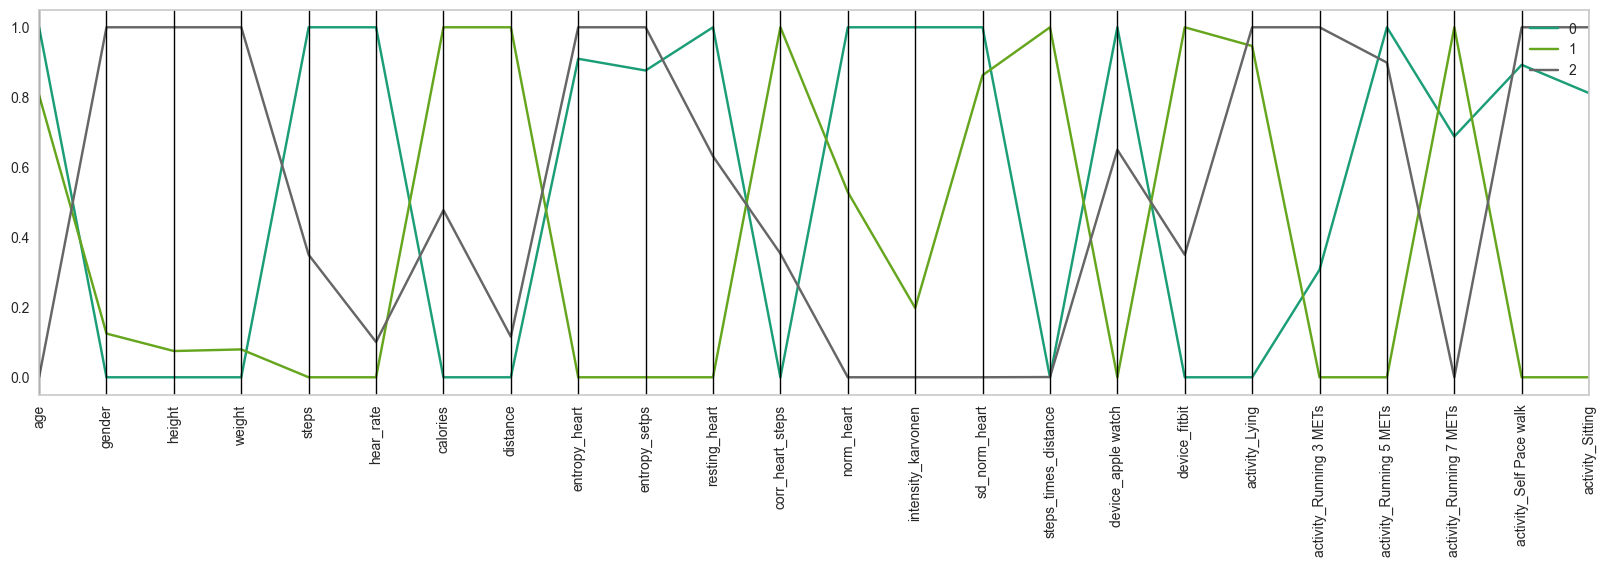

In [23]:
fig = plt.figure(figsize=(20,5))
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

Vamos a considerar la variable `gender` como sigue:
* `gender=0`: Genero femenino
* `gender=1`: Genero masculino

**Storytelling Cluster 0**: Este grupo se caracteriza por ser en promedio personas con mayor edad, de género femenino, con un peso y altura menores a la media, pero que realizan una mayor cantidad de pasos diarios y tienen una frecuencia cardíaca en reposo elevada. A pesar de esto, gastan menos calorías y recorren una distancia menor que otros grupos.

Los miembros de este grupo presentan valores altos en las medidas de entropía del corazón y los pasos, así como en la frecuencia cardíaca en reposo, mientras que tienen valores bajos en la correlación entre la frecuencia cardíaca y los pasos. También presentan valores altos en las medidas de la frecuencia cardíaca normalizada, la intensidad de Karvonen y la desviación estándar de la frecuencia cardíaca normalizada.

Este grupo utiliza principalmente un reloj Apple Watch para monitorear su actividad física. No registran actividad de estar acostados, pero muestran una actividad de correr en el 30% del valor máximo, con un valor máximo en la categoría de running 5 y un 70% del máximo de actividad en la categoría de running 7. Además, muestran una actividad de caminar en el 90% de sus registros de actividad y una actividad de estar sentados en el 80%.

**Storytelling Cluster 1**: Este grupo se caracteriza por ser personas con una edad intermedia y mayoritariamente de género femenino, con un peso y altura ligeramente por encima del mínimo recomendado. Aunque recorren una cantidad menor de pasos diarios y tienen una frecuencia cardíaca en reposo baja, gastan más calorías y recorren una distancia mayor que otros grupos.

Los miembros de este grupo presentan valores bajos en las medidas de entropía del corazón y los pasos, así como en la frecuencia cardíaca en reposo. Por otro lado, tienen valores altos en la correlación entre la frecuencia cardíaca y los pasos. Además, presentan valores al 50% de la frecuencia cardíaca normalizada, valores al 20% de la intensidad de Karvonen y valores al 90% de la desviación estándar de la frecuencia cardíaca normalizada. También tienen el valor más alto en la medida de la cantidad de pasos por distancia recorrida.

Este grupo utiliza principalmente un dispositivo Fitbit para monitorear su actividad física. Tienen un registro de actividad en posición de estar acostados del 95%, no tienen registro de actividad en la categoría de running 3 y running 5, pero presentan el valor más alto en la categoría de running 7. No tienen registro de actividad en la categoría de selfPacewalking ni sentados.

**Storytelling Cluster 2**: Este grupo se caracteriza por ser personas jóvenes, de género maculino, con una altura y peso corporal mayores que la media. Recorren una cantidad de pasos diarios intermedia, con una frecuencia cardíaca baja, y gastan una cantidad intermedia de calorías, pero recorren poca distancia.

Los miembros de este grupo presentan valores altos en las medidas de entropía del corazón y los pasos, así como en la frecuencia cardíaca en reposo (alrededor del 60% del máximo). También presentan valores moderados en la correlación entre la frecuencia cardíaca y los pasos (alrededor del 35% del máximo), mientras que tienen valores bajos en las medidas de la frecuencia cardíaca normalizada, la intensidad de Karvonen, la desviación estándar de la frecuencia cardíaca normalizada y la cantidad de pasos por distancia recorrida.

Este grupo utiliza principalmente un reloj Apple Watch para monitorear su actividad física (alrededor del 65% del tiempo), mientras que el resto utiliza un dispositivo Fitbit. Tienen el mayor registro de actividad en posición de estar acostados y en la categoría de running 3, con un registro en la categoría de running 5 del 90%, pero no tienen registro de actividad en la categoría de running 7. Además, tienen el mayor registro en la categoría de SelfPace walking y estar sentados.

In [24]:
d_orig

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,32.602427,0.110680,162.972718,63.162233,219.358436,102.637629,3.505672,0.124712,6.127022,5.997299,...,47.995909,0.993204,0.006796,0.204854,0.147087,0.166505,0.188835,0.142718,0.150000,0
1,31.121053,0.216374,164.179357,64.385848,12.899306,76.494543,37.983041,43.077113,5.713085,4.810877,...,2031.691136,0.000000,1.000000,0.226901,0.139766,0.145614,0.207018,0.139181,0.141520,1
2,24.968324,0.957097,179.064555,78.528869,85.149099,79.132470,19.967449,5.103590,6.167942,6.164485,...,49.285213,0.645549,0.354451,0.228148,0.163593,0.164395,0.148757,0.143144,0.151965,2


In [25]:
d_transf

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,...,steps_times_distance,device_apple watch,device_fitbit,activity_Lying,activity_Running 3 METs,activity_Running 5 METs,activity_Running 7 METs,activity_Self Pace walk,activity_Sitting,cluster
0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.910038,0.876488,...,0.00000,1.000000,0.000000,0.000000,0.307275,1.000000,0.687909,0.892713,0.811885,0
1,0.805953,0.124873,0.074984,0.079628,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.00000,0.000000,1.000000,0.946466,0.000000,0.000000,1.000000,0.000000,0.000000,1
2,0.000000,1.000000,1.000000,1.000000,0.349947,0.100903,0.477466,0.115916,1.000000,1.000000,...,0.00065,0.649967,0.350033,1.000000,1.000000,0.898984,0.000000,1.000000,1.000000,2


Scatter 3D

In [26]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,24,int64
1,gender,0,0.0,3279,0.523467,2,int64
2,height,0,0.0,0,0.000000,28,float64
3,weight,0,0.0,0,0.000000,43,float64
4,steps,0,0.0,0,0.000000,3919,float64
5,hear_rate,0,0.0,0,0.000000,4514,float64
6,calories,0,0.0,0,0.000000,2136,float64
7,distance,0,0.0,0,0.000000,4863,float64
8,entropy_heart,0,0.0,18,0.002874,56,float64
9,entropy_setps,0,0.0,90,0.014368,60,float64


In [27]:
# Tomamos muestra para que no nos explote el gráfico
d2=data.sample(n=300)

In [28]:
# Usamos plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='gender', y='age', z='calories', color='activity')
fig.show()

 5) Clustering con HDBSCAN 

5.1) Creación del modelo

In [29]:
import hdbscan

In [30]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(data_OHE)

HDBSCAN()

In [31]:
# Nro de cluster
model_hdb.labels_

array([195, 195, 195, ...,  87,  87,  87], dtype=int64)

In [32]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,2675,0.427043,0.427043
1,160,73,0.011654,0.438697
2,116,73,0.011654,0.450351
3,127,67,0.010696,0.461047
4,201,63,0.010057,0.471105
...,...,...,...,...
223,143,5,0.000798,0.996807
224,39,5,0.000798,0.997605
225,16,5,0.000798,0.998404
226,167,5,0.000798,0.999202


**227 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

5.2) Tuning/regularización de HDBSCAN para menos clusters

In [33]:
# Fijando min_cluster_size, cada cluster va a tener como mínimo 80 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(data_OHE)

In [34]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,-1,3380,0.539591,0.539591
1,1,1483,0.23675,0.776341
2,2,1227,0.195881,0.972222
3,0,174,0.027778,1.0


5.3) Análisis del modelo cluster (profiling)

In [35]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=data_OHE.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [36]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [37]:
x_data_cl.head(5)

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  ...  steps_times_distance  \
1       6.221612       6.116349  ...              0.089692   
2       6.221612       6.116349  ...              0.102088   
3       6.221612       6.116349  ...              0.115287   
4       6.221612       6.116349  ...              0.129286   
5       6.221612       6.116349  ...              0.144088   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                   1              0               1                        0   
2                   1              0               1                        0   
3                   1              0               1                        0   
4                   1              0               1                        0   
5                   1              0               1                        0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
5                        0                        0                        0   

   activity_Sitting  cluster  
1                 0        1  
2                 0        1  
3                 0        1  
4                 0        1  
5                 0        1  

[5 rows x 25 columns]

Saquemos el cluster de ruido:

In [38]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

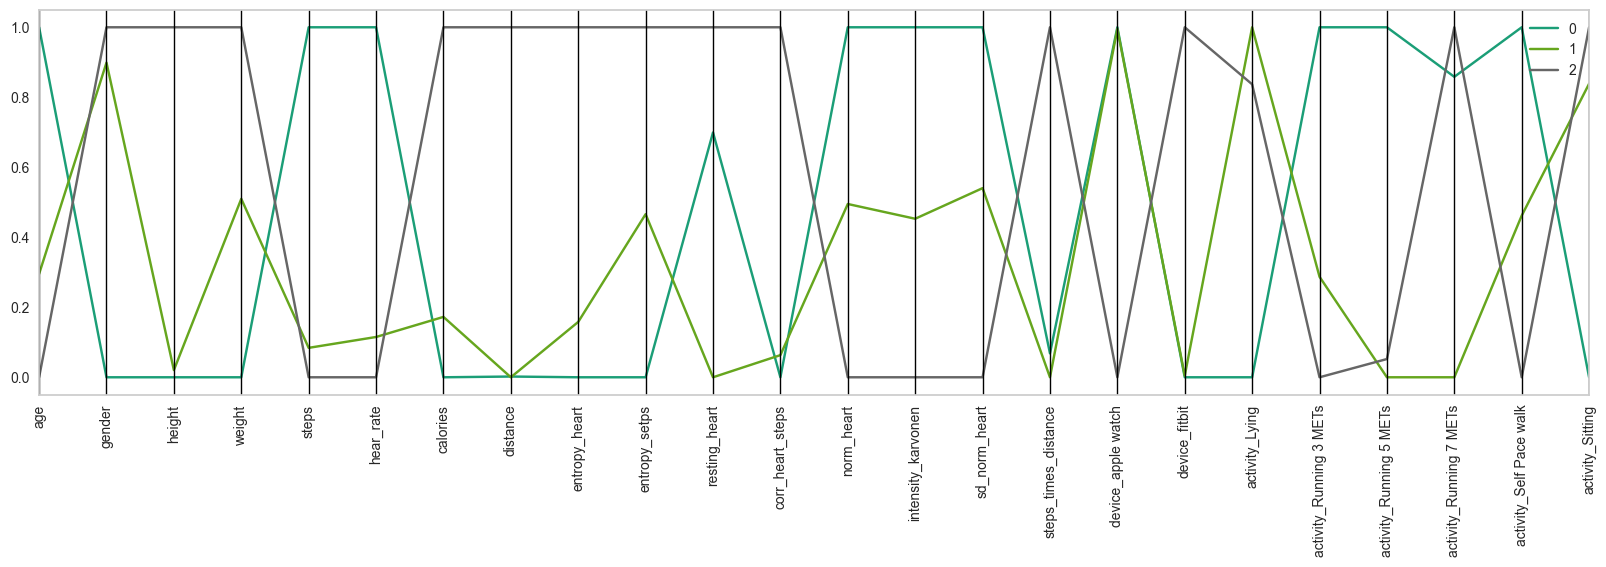

In [39]:
from funpymodeling.model_validation import coord_plot
fig = plt.figure(figsize=(20,5))
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

**Storytelling Cluster 0**: El Cluster 0 describe a un grupo de personas con las edades más avanzadas en comparación con los otros grupos, son del género femenino. Son personas livianas y de baja estatura, pero sorprendentemente son los que más pasos dan y tienen las pulsaciones más altas en promedio. A pesar de esto, gastan menos calorías y recorren menos distancia en comparación con los otros grupos.

En cuanto a su actividad cardíaca, presentan valores bajos de entropía en sus pulsaciones y pasos, y su ritmo cardíaco en reposo se encuentra en un 70% de la media. Además, presentan valores más bajos en la correlación entre la actividad cardíaca y los pasos. Por otro lado, tienen valores altos en la actividad cardíaca normalizada, la intensidad de Karvonen y la desviación estándar de la actividad cardíaca normalizada.

En términos de su actividad física, tienen un bajo valor de multiplicación entre los pasos y la distancia recorrida, y utilizan principalmente el Apple Watch como dispositivo de monitoreo. No se registra actividad de estar acostado, pero tienen valores máximos en la categoría de correr en los niveles 3 y 5, y un 90% en el nivel 7. En cambio, tienen el valor máximo en la categoría de caminar y el valor mínimo en la categoría de estar sentado.

**Storytelling Cluster 1**: El Cluster 1 describe a un grupo de personas jóvenes, con una edad que representa el 30% de la edad máxima en comparación con los otros grupos. En su mayoría son género masculino (90%), y aunque tienen un peso mínimo, su altura se encuentra en la mitad de los valores. Sorprendentemente, este grupo tiene la menor cantidad de pasos, las pulsaciones más bajas, gasta menos calorías y recorre la menor distancia en comparación con los otros grupos.

En términos de su actividad cardíaca y de pasos, presentan valores bajos de entropía en la actividad cardíaca y moderados en la actividad de pasos. Su ritmo cardíaco en reposo es el mínimo en comparación con los otros grupos, y presentan valores bajos en la correlación entre la actividad cardíaca y los pasos. Además, tienen valores moderados en la actividad cardíaca normalizada, la intensidad de Karvonen y la desviación estándar de la actividad cardíaca normalizada.

En cuanto a su actividad física, tienen el valor más bajo en la multiplicación entre los pasos y la distancia recorrida, y utilizan principalmente el Apple Watch como dispositivo de monitoreo. Tienen un registro del 100% en la actividad de estar acostado, y valores bajos en la categoría de correr en los niveles 3, 5 y 7. En cambio, tienen valores moderados en la categoría de caminar a un ritmo autodeterminado y un alto valor en la actividad de estar sentado.


**Storytelling Cluster 2**: El Cluster 2 describe a un grupo de personas más jóvenes, son género masculino, que son los más altos y tienen un mayor peso corporal en comparación con los otros grupos. Aunque recorren la menor cantidad de pasos, sorprendentemente son los que gastan más calorías y recorren la mayor distancia en comparación con los otros grupos.

 En cuanto a su actividad cardíaca y de pasos, presentan valores altos de entropía en ambas actividades, y su ritmo cardíaco en reposo es el más alto en comparación con los otros grupos. Además, tienen valores altos en la correlación entre la actividad cardíaca y los pasos. Por otro lado, presentan valores más bajos en la actividad cardíaca normalizada, la intensidad de Karvonen y la desviación estándar de la actividad cardíaca normalizada.

En términos de su actividad física, tienen el valor máximo en la multiplicación entre los pasos y la distancia recorrida, y utilizan principalmente el Fitbit como dispositivo de monitoreo. Tienen un registro del 90% en la actividad de estar acostado, y valores mínimos en la categoría de correr en el nivel 3, y valores bajos en la categoría de correr en el nivel 5. En cambio, tienen el valor máximo en la categoría de correr en el nivel 7, y el valor mínimo en la categoría de caminar a un ritmo autodeterminado, y el valor máximo en la actividad de estar sentado.





In [40]:
d_orig

age    gender      height     weight       steps  hear_rate  \
0  31.080460  0.293103  169.535632  68.191954  112.857903  99.400448   
1  28.429535  0.530007  169.607755  69.922454   15.159899  79.497681   
2  27.318663  0.556642  173.052078  71.586308    6.192562  76.908924   

    calories   distance  entropy_heart  entropy_setps  ...  \
0   2.749805   0.061978       6.147160       5.978724  ...   
1   8.809053   0.028732       6.164871       6.109383  ...   
2  37.879381  15.658552       6.259123       6.259123  ...   

   steps_times_distance  device_apple watch  device_fitbit  activity_Lying  \
0              6.961329             1.00000        0.00000        0.017241   
1              0.377174             0.99528        0.00472        0.257586   
2             96.667923             0.00000        1.00000        0.218419   

   activity_Running 3 METs  activity_Running 5 METs  activity_Running 7 METs  \
0                 0.298851                 0.304598                 0.120690   
1                 0.200270                 0.157788                 0.051922   
2                 0.160554                 0.165444                 0.132029   

   activity_Self Pace walk  activity_Sitting  cluster  
0                 0.224138          0.034483        0  
1                 0.189481          0.142953        1  
2                 0.159739          0.163814        2  

[3 rows x 25 columns]

In [41]:
d_transf

age    gender   height    weight    steps  hear_rate  calories  \
0  1.000000  0.000000  0.00000  0.000000  1.00000   1.000000  0.000000   
1  0.295303  0.898931  0.02051  0.509817  0.08407   0.115099  0.172483   
2  0.000000  1.000000  1.00000  1.000000  0.00000   0.000000  1.000000   

   distance  entropy_heart  entropy_setps  ...  steps_times_distance  \
0  0.002127       0.000000       0.000000  ...              0.068378   
1  0.000000       0.158186       0.465974  ...              0.000000   
2  1.000000       1.000000       1.000000  ...              1.000000   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
0             1.00000        0.00000        0.000000                 1.000000   
1             0.99528        0.00472        1.000000                 0.287177   
2             0.00000        1.00000        0.837038                 0.000000   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
0                 1.000000                 0.858444                 1.000000   
1                 0.000000                 0.000000                 0.461835   
2                 0.052149                 1.000000                 0.000000   

   activity_Sitting  cluster  
0          0.000000        0  
1          0.838703        1  
2          1.000000        2  

[3 rows x 25 columns]

5.4) _Sanity check!

In [42]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [43]:
data_check.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0               1.0   19.531302   
2       6.221612       6.116349           59.0               1.0   19.453390   
3       6.221612       6.116349           59.0               1.0   19.540825   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520            1.0              0.089692  apple watch   
2            0.137967            1.0              0.102088  apple watch   
3            0.138587            1.0              0.115287  apple watch   

  activity  cluster  
1    Lying        1  
2    Lying        1  
3    Lying        1

 5.5) Calculo de Silhouette

Calculandolo para HDBSCAN

In [44]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(data_OHE, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [45]:
sil_avg

-0.21245811607860937

`silhouette_samples` nos da el valor silhouette para cada registro:

In [46]:
sample_silhouette_values = silhouette_samples(data_OHE, model_hdb2.labels_)

In [47]:
sample_silhouette_values

array([ 0.68584835,  0.69083926,  0.69524082, ..., -0.94444757,
       -0.94444757, -0.94444757])

In [48]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})
res_sil

sil_value  cluster
0      0.685848        1
1      0.690839        1
2      0.695241        1
3      0.693751        1
4      0.691409        1
...         ...      ...
6259  -0.944408       -1
6260  -0.944448       -1
6261  -0.944448       -1
6262  -0.944448       -1
6263  -0.944448       -1

[6264 rows x 2 columns]

Nuevo gráfico para observar la distribución

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

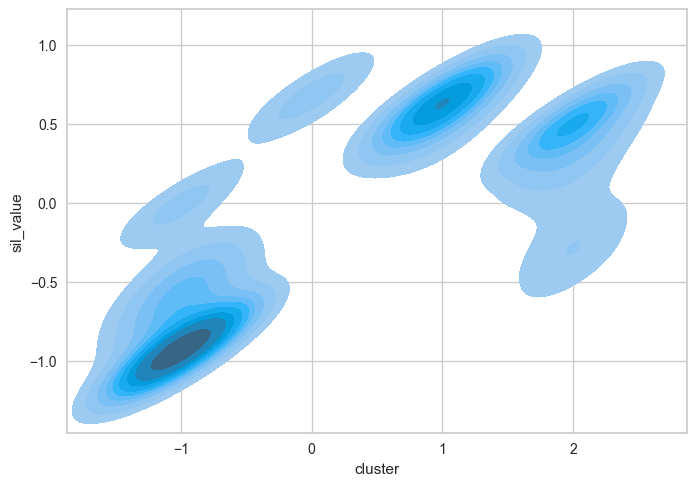

In [49]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True) 

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

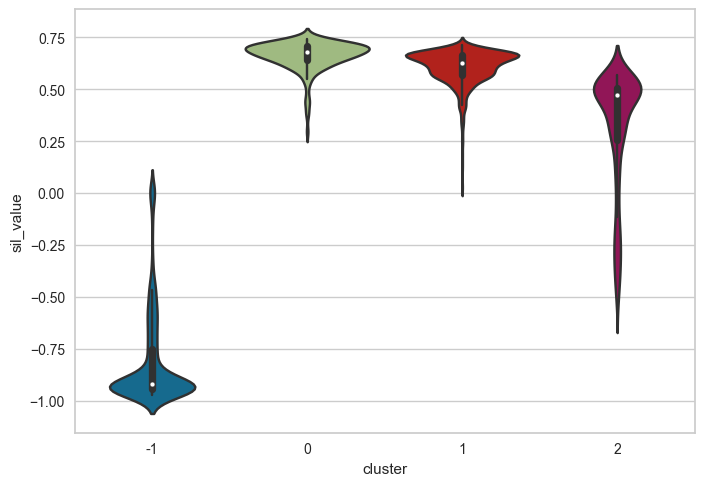

In [50]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<AxesSubplot: xlabel='cluster', ylabel='sil_value'>

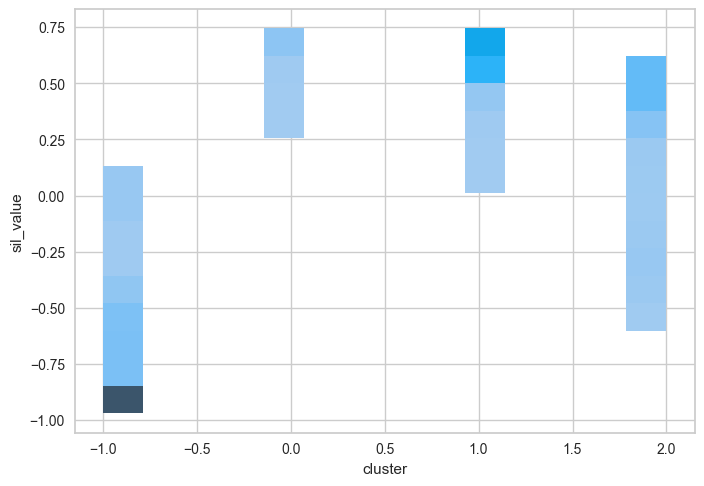

In [51]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [52]:
res_sil.groupby('cluster').mean('sil_value')

sil_value
cluster           
-1       -0.808922
 0        0.663534
 1        0.607415
 2        0.315458